In [10]:
import csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("data/one_hot_enc.csv")
data.head()

,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,...,LSH 602_IsSystem,LSH 602_Value,LSH 603_IsSystem,LSH 603_Value,LSL 601_IsSystem,LSL 601_Value,LSL 602_IsSystem,LSL 602_Value,LSL 603_IsSystem,LSL 603_Value
0,0,0.0,729.8658,1,3,2,1,142.527557,9.293002,198.077423,...,False,1,False,0,False,0,False,0,False,1
1,0,0.0,729.4340,1,3,2,1,142.527557,9.293002,198.385025,...,False,1,False,0,False,0,False,0,False,1
2,0,0.0,729.1200,1,3,2,1,142.527557,9.293002,198.436300,...,False,1,False,0,False,0,False,0,False,1
3,0,0.0,728.6882,1,3,2,1,142.527557,9.289157,198.667000,...,False,1,False,0,False,0,False,0,False,1
4,0,0.0,727.7069,1,3,2,1,142.527557,9.289157,198.897720,...,False,1,False,0,False,0,False,0,False,1


In [6]:
X = data.drop('Label', axis=1)
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((10497, 88), (4499, 88))

In [9]:
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
mlp = MLPClassifier(random_state=42, max_iter=200)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
mlp.fit(X_train, y_train)

dt_preds = dt.predict(X_test)
rf_preds = rf.predict(X_test)
xgb_preds = xgb.predict(X_test)
mlp_preds = mlp.predict(X_test)

dt_acc = accuracy_score(y_test, dt_preds)
rf_acc = accuracy_score(y_test, rf_preds)
xgb_acc = accuracy_score(y_test, xgb_preds)
mlp_acc = accuracy_score(y_test, mlp_preds)

dt_acc, rf_acc, xgb_acc, mlp_acc

(0.9988886419204268,
 0.9991109135363414,
 0.9991109135363414,
 0.9075350077795066)

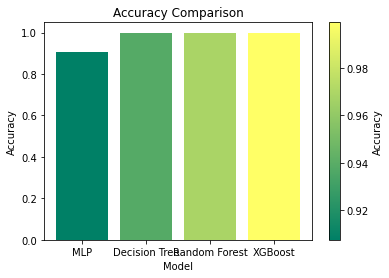

In [21]:
models = ['Decision Tree', 'Random Forest', 'XGBoost', 'MLP']
accuracies = [dt_acc, rf_acc, xgb_acc, mlp_acc]

sorted_indices = sorted(range(len(accuracies)), key=lambda k: accuracies[k])
sorted_models = [models[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]

colors = plt.cm.summer(np.linspace(0, 1, len(sorted_accuracies)))

plt.bar(sorted_models, sorted_accuracies, color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

sm = plt.cm.ScalarMappable(cmap=plt.cm.summer, norm=plt.Normalize(vmin=min(accuracies), vmax=max(accuracies)))
sm.set_array([])
plt.colorbar(sm, label="Accuracy")

plt.show()